In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#SPARCS dataset exploration
Summary from https://health.data.ny.gov/api/views/3m9u-ws8e/files/36BsAxNLFSSox4N2_Sw9cG1BnJKJ4rCbUCS8qWDZKB0?download=true&filename=NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_Intro_to_SPARCS.pdf :

>###What is SPARCS?

>- Statewide Planning and Research Cooperative System (SPARCS)
- Cooperation between the health care industry and government
- Been in existence over 30 years: established through statute in 1979
- Calendar Year Based Discharge/Visit Dataset
- *Claim level detail on patient characteristics, diagnoses and treatments, services, and charges for hospital discharges, ambulatory surgery, emergency department, and hospital based outpatient service visits (or EODC) in New York State*


There's an overview of the project available here https://www.health.ny.gov/statistics/sparcs/ . 
Researchers can apply for multiple levels of access to this data, with the most restricted file containing individually identifiable elements such as SSN and dates of birth for patients. 

The file I am exploring here is the least-restricted version, containing summary-level details per patient stay at a hospital inpatient facility in 2012. This level of file for years 2009-2013 are available here: https://health.data.ny.gov/en/browse?q=sparcs+inpatient+downloadable

In [2]:
# File has been downloaded already. It is roughly 1GB in size, with about 2,500,000 rows. 
dataURI = 'Hospital_Inpatient_Discharges__SPARCS_De-Identified___2012.csv'
csv = pd.read_csv(dataURI)

/Users/corey/.virtualenvs/GA/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (10,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529422 entries, 0 to 2529421
Data columns (total 38 columns):
Health Service Area                    object
Hospital County                        object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                          object
Age Group                              object
Zip Code - 3 digits                    object
Gender                                 object
Race                                   object
Ethnicity                              object
Length of Stay                         object
Admit Day of Week                      object
Type of Admission                      object
Patient Disposition                    object
Discharge Year                         int64
Discharge Day of Week                  object
CCS Diagnosis Code                     int64
CCS Diagnosis Description              object
CCS Procedure Code                     int64
CCS Procedure 

In [4]:
# 3 sample rows:
csv.head(3).transpose()

,0,1,2
Health Service Area,Capital/Adiron,Capital/Adiron,Capital/Adiron
Hospital County,Albany,Albany,Albany
Operating Certificate Number,101000,101000,101000
Facility Id,1,1,1
Facility Name,Albany Medical Center Hospital,Albany Medical Center Hospital,Albany Medical Center Hospital
Age Group,50 to 69,30 to 49,70 or Older
Zip Code - 3 digits,120,121,120
Gender,M,F,M
Race,White,Other Race,White
Ethnicity,Not Span/Hispanic,Not Span/Hispanic,Not Span/Hispanic


##Cleaning the data: 

- "Zip Code - 3 digits" should have the full 6 digits if we're going to use it for anything. 
- These fields seem irrelevant for our purposes, we should drop: 
    - Birth Weight
    - Abortion Edit Indicator
    - Other Provider License Number
    - operating certificate number
- rows with procedure codes of zero are going to prevent us from including those rows in our group by procedure code below (our least granular means of comparing costs), let's drop those as well. 
- "Total Charges" is a string with a dollar sign at the front, not particularly useful for performing any operations on it. 



In [14]:
data = csv.drop(["Birth Weight", "Abortion Edit Indicator", "Other Provider License Number", "Operating Certificate Number"], axis=1)

Index([u'Health Service Area', u'Hospital County', u'Facility Id', u'Facility Name', u'Age Group', u'Zip Code - 3 digits', u'Gender', u'Race', u'Ethnicity', u'Length of Stay', u'Admit Day of Week', u'Type of Admission', u'Patient Disposition', u'Discharge Year', u'Discharge Day of Week', u'CCS Diagnosis Code', u'CCS Diagnosis Description', u'CCS Procedure Code', u'CCS Procedure Description', u'APR DRG Code', u'APR DRG Description', u'APR MDC Code', u'APR MDC Description', u'APR Severity of Illness Code', u'APR Severity of Illness Description', u'APR Risk of Mortality', u'APR Medical Surgical Description', u'Source of Payment 1', u'Source of Payment 2', u'Source of Payment 3', u'Attending Provider License Number', u'Operating Provider License Number', u'Emergency Department Indicator', u'Total Charges'], dtype='object')

In [95]:
# TODO: remap zipcodes with a 100 in front, get rid of non-zipcodelike values
# data["Zip Code - 3 digits"] = data["Zip Code - 3 digits"].astype(int)
# data["Zip Code - 3 digits"] += 10000

In [5]:
print "number of unique procedure codes: " + str(len(pd.unique(csv['CCS Procedure Code'])))

number of unique procedure codes: 231


In [ ]:
# rows with procedure codes of zero
# operating certificate number

In [6]:
# do we have procedure codes for every line? 
grouped = csv.groupby('CCS Procedure Code')
size = grouped.size()
print "Number of lines with a procedure code: "
print size.sum()
# how many records exist for each procedure code? 
print size

Number of lines with a procedure code: 
2529422
CCS Procedure Code
0                     626963
1                       6804
2                       1479
3                       9837
4                      12041
5                       2631
6                        159
7                        621
8                        612
9                       5496
10                      4842
11                       195
12                      2392
13                        23
14                        27
...
217                    27770
218                    51179
219                    67735
220                    53184
221                     5240
222                    50417
223                    12425
224                    11809
225                     4129
226                     6593
227                    18639
228                    76856
229                      574
230                        2
231                   164699
Length: 231, dtype: int64


In [33]:
# What is a procedure code of "0"? There seem to be a lot of those. 
# According to the Utah DOH, a procedure code of 0 indicates 'no procedure'. 
# http://health.utah.gov/opha/IBIShelp/codes/CCS.htm That's not very helpful, let's drop those. 

print len(data)
rows = data[data['CCS Procedure Code'] == 0].index
data.drop(rows, inplace=True)
print len(data)

2529422
1902459


## Now that things have been cleaned up a little...
What's our thesis here?
We think that costs vary wildly for the same procedure at different hospitals, based on a variety of factors. Maybe some doctors are more expensive. Maybe some hospitals negotiate higher fees. Maybe some hospitals use Kleenex brand tissues and maybe some use generics. Is this the case? 

Let's plot a histogram of cost values for CCS procedure code 80 (an Appendectomy), and look at the distribution.  

count      18075.000000
mean       23322.762975
std        22192.666539
min            1.000000
25%        13679.010000
50%        19435.500000
75%        27119.890000
max      1070905.760000
dtype: float64

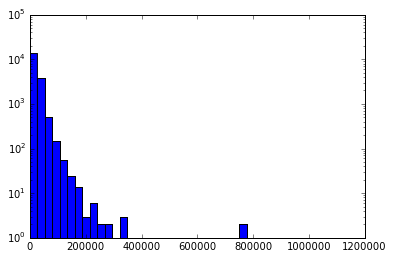

In [93]:
appendectomies = data[data['CCS Procedure Code'] == 80]['Total Charges']
appendectomies = [float(i.strip('$')) for i in appendectomies.values]
plt.hist(appendectomies, bins=40, log=True)
pd.Series(appendectomies).describe()

In [ ]:
# TODO: 
# plot the highest cost procedures, lowest cost procedures
# highest cost zipcodes, lowest cost zipcodes, deviations - plot on map
# highest cost hospitals, lowest cost hospitals, deviations
# highest cost providers, lowest cost hospitals, deviations